In [23]:
#lib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [24]:
doc =  '../Data/All_data/merged/BTC_merged_premium_vol.csv'
name = 'Binance_BTCUSDT_perpetual_1H_OHL.csv'
output =  '../Data/factor/BTC_merged_premium_vol_facto.csv'

df = pd.read_csv(doc)
df
fator1  = 'Volume'
factor2 = 'pre_Close'

factor 1 zscore

In [25]:
df['factor_1'] = np.log1p(df[fator1])
df['factor1_mean'] = df[fator1].rolling(window = 52).mean()
df['factor1_std']         = df[fator1].std()
df['factor1_zscore']      = (df[fator1] - df['factor1_mean']) /df['factor1_std']



factor 2 zscore

In [26]:
df['factor_2'] = np.log1p(df[factor2])
df['factor2_mean'] = np.log1p(df[factor2].rolling(window = 52).mean())
df['factor2_std']         = df[factor2].std()
df['factor2_zscore']      = (df[factor2] - df['factor2_mean']) /df['factor2_std']



In [27]:
df['factor_merge1'] = df['factor1_zscore'].rolling(window =24).corr(df['factor2_zscore'],'spearman')
df['factor_merge1'] 

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
45221    0.278505
45222    0.284412
45223    0.297824
45224    0.323214
45225    0.337310
Name: factor_merge1, Length: 45226, dtype: float64

In [28]:
df['factor_merge2'] =df['factor_merge1'].rolling(window =24).corr(df['factor1_zscore'],'spearman')
df['factor_merge2']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
45221   -0.010414
45222   -0.031191
45223   -0.068181
45224   -0.137148
45225   -0.127122
Name: factor_merge2, Length: 45226, dtype: float64

In [29]:
df['factor'] = df['factor_merge2'].fillna(0)
df.to_csv(output)

In [ ]:
#change
df['change_open'] = df['oi_close'].pct_change() + 1 
df['change_open_taker_ratio']      = df['change_open'] * df['taker_ratio']
df.to_csv(output)

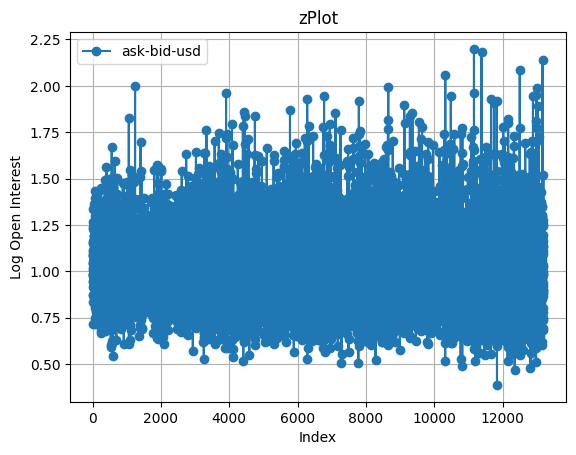

In [18]:
#plot 資料
plt.figure("z")
plt.plot(df.index, df['factor'], marker='o', label='ask-bid-usd')  # 使用折線圖
plt.xlabel("Index")  # X 軸標籤
plt.ylabel("Log Open Interest")  # Y 軸標籤
plt.title("zPlot")  # 圖形標題
plt.legend()  # 顯示圖例
plt.grid(True)  # 添加網格
plt.show()

In [ ]:

df['Date'] = csv['Date']
df['Volume'] = np.multiply(csv['Close'],csv['Volume'])
df['Close']  = csv['Close']
df['taker_buy_vol'] = csv['Taker Buy Quote Asset Volume']
df['taker_sell_vol'] = np.subtract(df['Volume'] , csv['Taker Buy Quote Asset Volume'])
df['taker_sel_buy_ratio'] =df['taker_buy_vol']/df['taker_sell_vol']
df.to_csv(output)
 